# Data Load

In [1]:
import os
import numpy as np
from PIL import Image
import natsort

case = input()
if case == '5':
    max_speed = float(input('input max speed : '))
    file_path = "./heatmap_case5_0.2_speed"+str(max_speed)
elif case == '6':
    gradual = input('input gradual degree 5/15/50 : ')
    
    file_path = './rand_grad'+gradual+'_2k'
else:
    file_path = './heatmap_case'+case+'_0.2'
    
file_list = os.listdir(file_path)
file_list = natsort.natsorted(file_list, key=None, reverse=False, alg=0)

num_of_files = len(file_list)

# Assuming all images have the same height and width
first_image = Image.open(os.path.join(file_path, file_list[0]))
height, width = np.array(first_image).shape

# Create an empty NumPy array to store the images
image_array = np.empty((num_of_files, height, width))

# Iterate through the file list and load images
for i, file_name in enumerate(file_list):
    if i < 5:
        print(file_name)
    image = Image.open(os.path.join(file_path, file_name))
    image_array[i] = np.array(image)

# image_array now contains the images as NumPy arrays
print(image_array.shape)  # (num_of_files, height, width)
print(file_list[:10])

 6
input gradual degree 5/15/50 :  50


train0.png
train1.png
train2.png
train3.png
train4.png
(1300, 16, 128)
['train0.png', 'train1.png', 'train2.png', 'train3.png', 'train4.png', 'train5.png', 'train6.png', 'train7.png', 'train8.png', 'train9.png']


In [2]:
import os
import numpy as np
from PIL import Image


num_of_frames = 13  # Specify the desired number of frames

# Assuming all images have the same height and width
first_image = Image.open(os.path.join(file_path, file_list[0]))
height, width = np.array(first_image).shape[:2]

# Create an empty NumPy array to store the images
dataset = np.empty((num_of_files-num_of_frames+1, num_of_frames, height, width))

# Iterate through the file list and load images
for i in range(num_of_files-num_of_frames+1):
    frame_images = file_list[i : i+num_of_frames]
    for j, file_name in enumerate(frame_images):
        if i < 2:
            print(file_name)
        image = Image.open(os.path.join(file_path, file_name))
        dataset[i, j] = np.array(image)
    if i < 2:
        print()

# dataset now contains the images bound into frames
print(dataset.shape)  # (num_of_files // num_of_frames, num_of_frames, height, width)

train0.png
train1.png
train2.png
train3.png
train4.png
train5.png
train6.png
train7.png
train8.png
train9.png
train10.png
train11.png
train12.png

train1.png
train2.png
train3.png
train4.png
train5.png
train6.png
train7.png
train8.png
train9.png
train10.png
train11.png
train12.png
train13.png

(1288, 13, 16, 128)


In [3]:
# Add a channel dimension since the images are grayscale.
dataset = np.expand_dims(dataset, axis=-1)
dataset.shape #(num_of_samples, frames, height, width, channels)

(1288, 13, 16, 128, 1)

In [4]:
time_interval = 6
number_of_image_per_day = int(24/time_interval)
number_of_days_for_prediction = 21

number_of_prediction = number_of_image_per_day * number_of_days_for_prediction
number_of_prediction

84

In [5]:
test_dataset = dataset[-number_of_prediction:,...]

# Normalize the data to the 0-1 range.
test_dataset = test_dataset / 255
print('test dataset : ', test_dataset.shape)

test dataset :  (84, 13, 16, 128, 1)


# Similiarity Degree

In [6]:
import numpy as np

window_size  = 12

def create_shifted_frames(data, mec_index): # data = (frames, mecs, movieId, gray_scale)
    tmp_data = data[:,mec_index,:,:]
    tmp_data = np.squeeze(tmp_data)
    tmp_data = tmp_data.transpose()

    # Define the parameters
    num_rows, num_columns = tmp_data.shape

    # Calculate the number of resulting rows
    num_result_rows = num_columns - window_size + 1
    number_of_patterns = num_columns - window_size + 1

    # Initialize the final matrix
    #final_matrix = np.zeros((num_rows, num_result_rows, window_size))
    final_matrix = np.zeros((num_rows, window_size+1, number_of_patterns))
    print(tmp_data.shape)

    return tmp_data

In [7]:
from IPython.display import clear_output

X_test = [[] for _ in range(test_dataset.shape[2])]
Y_test = [[] for _ in range(test_dataset.shape[2])]

for day_index, oneday_dataset in enumerate(test_dataset):
    for mec_index in range(oneday_dataset.shape[1]):
        clear_output(wait=True)
        print(day_index, ' test ...')
        
        try:
            if mec_index != observe_mec_index:
                continue
        except:
            print('no observe mec index')

        print(mec_index,' 번째 mec 데이터 생성중 ...')
        frame_dataset = create_shifted_frames(oneday_dataset, mec_index)
        print('frame shape : ', frame_dataset.shape)

        X,Y = np.empty((1,12,1)), np.empty((1))
        for movieId_index, movieId in enumerate(frame_dataset):
            print(movieId_index, ' movie  test ... ', movieId.shape)
            x = movieId[:-1]
            x = np.array([[x[i] for i in range(j,j+window_size)] for j in range(len(x)-window_size+1)])
            y = movieId[window_size:]
            x = np.expand_dims(x, axis=-1)
            #print('final X,Y shape : ',  x.shape, y.shape)
            X = np.append(X,x, axis=0)
            Y = np.append(Y,y, axis=0)

        X = np.delete(X, 0, axis=0)
        Y = np.delete(Y, 0, axis=0)
        try:
            X_test[mec_index].extend(X)
            Y_test[mec_index].extend(Y)
        except:
            X_test[mec_index] = np.append(X_test[mec_index], X, axis=0)
            Y_test[mec_index] = np.append(Y_test[mec_index], Y, axis=0)

X_test = np.array(X_test)
Y_test = np.array(Y_test)
print(X_test.shape, Y_test.shape)

83  test ...
no observe mec index
15  번째 mec 데이터 생성중 ...
(128, 13)
frame shape :  (128, 13)
0  movie  test ...  (13,)
1  movie  test ...  (13,)
2  movie  test ...  (13,)
3  movie  test ...  (13,)
4  movie  test ...  (13,)
5  movie  test ...  (13,)
6  movie  test ...  (13,)
7  movie  test ...  (13,)
8  movie  test ...  (13,)
9  movie  test ...  (13,)
10  movie  test ...  (13,)
11  movie  test ...  (13,)
12  movie  test ...  (13,)
13  movie  test ...  (13,)
14  movie  test ...  (13,)
15  movie  test ...  (13,)
16  movie  test ...  (13,)
17  movie  test ...  (13,)
18  movie  test ...  (13,)
19  movie  test ...  (13,)
20  movie  test ...  (13,)
21  movie  test ...  (13,)
22  movie  test ...  (13,)
23  movie  test ...  (13,)
24  movie  test ...  (13,)
25  movie  test ...  (13,)
26  movie  test ...  (13,)
27  movie  test ...  (13,)
28  movie  test ...  (13,)
29  movie  test ...  (13,)
30  movie  test ...  (13,)
31  movie  test ...  (13,)
32  movie  test ...  (13,)
33  movie  test ...  (13,)


# Model Load

In [23]:
K = 16

def find_top_k_indices(matrix):
    result = []
    if len(matrix.shape) == 2: # matrix인 경우
        for row in matrix:
            mecs_top_k = []
            # (인덱스, 값) 쌍으로 이루어진 리스트를 생성합니다.
            indices_values = [(index, value) for index, value in enumerate(row)]
            #print(indices_values)
            # 값에 따라 정렬합니다. (큰 값이 먼저 오도록)
            sorted_indices_values = sorted(indices_values, key=lambda x: x[1], reverse=True)
            # 상위 32개의 인덱스를 결과에 추가합니다.
            top_indices = [index for index, _ in sorted_indices_values[:K]]
            mecs_top_k.extend(top_indices)
            result.append(mecs_top_k)
        return result
    
    elif len(matrix.shape) == 1: # list 인 경우 
        indices_values = [(index, value) for index, value in enumerate(matrix)]
        sorted_indices_values = sorted(indices_values, key=lambda x:x[1], reverse=True)
        top_indices = [index for index,_ in sorted_indices_values[:K]]
        result.extend(top_indices)

        return result

# ConvLSTM

In [9]:
from tensorflow import keras

if case == '5':
    convlstm= keras.models.load_model('./convlstm_models/convlstm_windowsize'+str(window_size)+'_'+file_path[10:])
elif case =='6':
    convlstm = keras.models.load_model('./convlstm_models/convlstm_windowsize'+str(window_size)+'_'+file_path[2:])
else:
    convlstm= keras.models.load_model('./convlstm_models/convlstm_windowsize'+str(window_size)+'_'+file_path[-9:])
convlstm.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, 16, 128, 1  0         
                             )]                                  
                                                                 
 conv_lst_m2d (ConvLSTM2D)   (None, None, 16, 128, 64  416256    
                             )                                   
                                                                 
 batch_normalization (BatchN  (None, None, 16, 128, 64  256      
 ormalization)               )                                   
                                                                 
 conv_lst_m2d_1 (ConvLSTM2D)  (None, None, 16, 128, 64  295168   
                             )                                   
                                                                 
 batch_normalization_1 (Batc  (None, None, 16, 128, 64  256

In [10]:
def predict_next_frames(model, example, num_of_frames):

    # Extract the model's prediction and post-process it.
    new_prediction = model.predict(np.expand_dims(example[:-1], axis=0))
    new_prediction = np.squeeze(new_prediction, axis=0)
    predicted_frame = np.expand_dims(new_prediction[-1, ...], axis=0)

    print('model input shape : ', np.expand_dims(example[:-1], axis=0).shape)
    print('model output shape : ', predicted_frame.shape)

    return predicted_frame

In [11]:
# Select a random example from the testidation dataset.
np.random.seed(42)
convlstm_truths = []
convlstm_predictions = []

for test_index in range(test_dataset.shape[0]): # 모든 test_dataset에 대해 predict
    example = test_dataset[test_index]
    print(test_index,'번째 example shape : ', example.shape)

    original_frame = example[-1,...]
    new_prediction = predict_next_frames(convlstm, example, num_of_frames)

    original_frame = np.squeeze(original_frame)
    new_prediction = np.squeeze(new_prediction)

    convlstm_truths.append(original_frame)
    convlstm_predictions.append(new_prediction)

convlstm_truths = np.array(convlstm_truths)
convlstm_predictions = np.array(convlstm_predictions)
print(convlstm_truths.shape, convlstm_predictions.shape)

0 번째 example shape :  (13, 16, 128, 1)
1/1 [==============================] - 1s 730ms/step
model input shape :  (1, 12, 16, 128, 1)
model output shape :  (1, 16, 128, 1)
1 번째 example shape :  (13, 16, 128, 1)
1/1 [==============================] - 0s 248ms/step
model input shape :  (1, 12, 16, 128, 1)
model output shape :  (1, 16, 128, 1)
2 번째 example shape :  (13, 16, 128, 1)
1/1 [==============================] - 0s 248ms/step
model input shape :  (1, 12, 16, 128, 1)
model output shape :  (1, 16, 128, 1)
3 번째 example shape :  (13, 16, 128, 1)
1/1 [==============================] - 0s 245ms/step
model input shape :  (1, 12, 16, 128, 1)
model output shape :  (1, 16, 128, 1)
4 번째 example shape :  (13, 16, 128, 1)
1/1 [==============================] - 0s 254ms/step
model input shape :  (1, 12, 16, 128, 1)
model output shape :  (1, 16, 128, 1)
5 번째 example shape :  (13, 16, 128, 1)
1/1 [==============================] - 0s 248ms/step
model input shape :  (1, 12, 16, 128, 1)
model output

In [12]:
tmp_truths = [[] for _ in range(test_dataset.shape[2])]
tmp_predictions = [[] for _ in range(test_dataset.shape[2])]

for convlstm_truth, convlstm_prediction in zip(convlstm_truths, convlstm_predictions):
    for idx, row in enumerate(convlstm_truth):
        tmp_truths[idx].extend(row)
        
    for idx, row in enumerate(convlstm_prediction):
        tmp_predictions[idx].extend(row)

tmp_truths = np.array(tmp_truths)
tmp_predictions = np.array(tmp_predictions)

convlstm_truths, convlstm_predictions = tmp_truths, tmp_predictions
print(convlstm_truths.shape, convlstm_predictions.shape)

(16, 10752) (16, 10752)


In [24]:
np.random.seed(42)
conv_lstm_conformity_list = [[] for _ in range(test_dataset.shape[2])] # mecs수 만큼 빈 객체 생성


for i in range(0, Y_test.shape[1], test_dataset.shape[3]):
    # calculate truth popularity change
    truths = convlstm_truths[:,i:i+test_dataset.shape[3]] # 64개씩 짤라서 t 시점 matrix(=image) 생성 
    prediction = convlstm_predictions[:, i:i+test_dataset.shape[3]]

    top_k_truths = find_top_k_indices(truths)
    top_k_predicts = find_top_k_indices(prediction)

    for idx, (truth, predict) in enumerate(zip(top_k_truths, top_k_predicts)):
        conformity = sum([1 for i in predict if i in truth])
        conv_lstm_conformity_list[idx].append(conformity)
    
print('hit rate log 개수 : ', len(conv_lstm_conformity_list))
print('hit rate log per mec : ', len(conv_lstm_conformity_list[0]))

hit rate log 개수 :  16
hit rate log per mec :  84


# LSTM

In [14]:
import tensorflow as tf
from tensorflow import keras

with tf.device("/gpu:0"):
    predictions = [[] for _ in range(test_dataset.shape[2])]
    for mec_index in range(test_dataset.shape[2]): # mecs만큼 반복
        print(mec_index,'mec 예측중 ...')
        if case == '5':
            model = keras.models.load_model('./rnn_models/MEC'+str(mec_index)+'rnn_'+file_path[10:])
        elif case == '6':
            model = keras.models.load_model('./rnn_models/MEC'+str(mec_index)+'rnn_'+file_path[2:])
        else:
            model = keras.models.load_model('./rnn_models/MEC'+str(mec_index)+'rnn_'+file_path[-9:])
        predictions[mec_index].extend(model.predict(X_test[mec_index], verbose=0))
    predictions = np.array(predictions)
    print(predictions.shape)

0 mec 예측중 ...
1 mec 예측중 ...
2 mec 예측중 ...
3 mec 예측중 ...
4 mec 예측중 ...
5 mec 예측중 ...
6 mec 예측중 ...
7 mec 예측중 ...
8 mec 예측중 ...
9 mec 예측중 ...
10 mec 예측중 ...
11 mec 예측중 ...
12 mec 예측중 ...
13 mec 예측중 ...
14 mec 예측중 ...
15 mec 예측중 ...
(16, 10752, 1, 1)


In [15]:
predictions = predictions.squeeze()
predictions.shape

(16, 10752)

In [25]:
np.random.seed(42)
lstm_conformity_list = [[] for _ in range(test_dataset.shape[2])] # mecs수 만큼 빈 객체 생성


for i in range(0, Y_test.shape[1], test_dataset.shape[3]):
    # calculate truth popularity change
    truths = Y_test[:,i:i+test_dataset.shape[3]] # 64개씩 짤라서 t 시점 matrix(=image) 생성 
    prediction = predictions[:, i:i+test_dataset.shape[3]]

    top_k_truths = find_top_k_indices(truths)
    top_k_predicts = find_top_k_indices(prediction)

    for idx, (truth, predict) in enumerate(zip(top_k_truths, top_k_predicts)):
        conformity = sum([1 for i in predict if i in truth])
        lstm_conformity_list[idx].append(conformity)
    
print('hit rate log 개수 : ', len(lstm_conformity_list))
print('hit rate log per mec : ', len(lstm_conformity_list[0]))

hit rate log 개수 :  16
hit rate log per mec :  84


In [26]:
conv_lstm_conformity_list = (np.array(conv_lstm_conformity_list) / K) * 100
lstm_conformity_list = (np.array(lstm_conformity_list) / K) * 100

In [27]:
print('ConvLSTM similarity change(mean) per mecs  : ', np.mean(conv_lstm_conformity_list, axis=1))
print('ConvLSTM similarity change mean, stddev : ', np.mean(np.mean(conv_lstm_conformity_list, axis=1)), np.std(np.mean(conv_lstm_conformity_list, axis=1)))
print()
print('LSTM similarity change(mean) per mecs  : ', np.mean(lstm_conformity_list, axis=1))
print('LSTM similarity change mean, stddev : ', np.mean(np.mean(lstm_conformity_list, axis=1)), np.std(np.mean(lstm_conformity_list, axis=1)))
print()

ConvLSTM similarity change(mean) per mecs  :  [98.51190476 98.95833333 99.10714286 99.18154762 99.0327381  99.10714286
 99.0327381  99.0327381  99.0327381  98.95833333 98.95833333 98.88392857
 98.73511905 97.99107143 98.4375     20.68452381]
ConvLSTM similarity change mean, stddev :  93.97786458333334 18.926644468518628

LSTM similarity change(mean) per mecs  :  [12.35119048 13.39285714 13.31845238 13.0952381  12.87202381 13.76488095
 12.64880952 12.94642857 12.64880952 12.64880952 13.39285714 13.02083333
 13.83928571 12.72321429 12.72321429 11.97916667]
LSTM similarity change mean, stddev :  12.960379464285715 0.4801981175569223



# Similiarity Degree Visualization

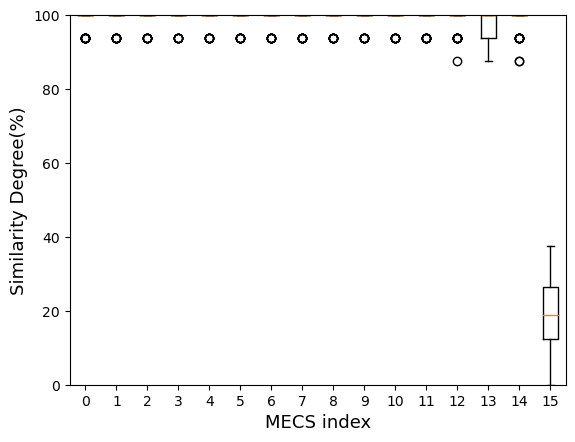

In [28]:
import matplotlib.pyplot as plt

number_of_predict_days = 60

# Create a list of labels for the 16 MECs (e.g., MEC_1, MEC_2, ..., MEC_16)
mec_labels = [f"{i}" for i in range(image_array.shape[1])]

# Create a figure and axis object for the boxplot
fig, ax = plt.subplots()

# Create the boxplot using the boxplot function
ax.boxplot(conv_lstm_conformity_list[:,:number_of_predict_days].T, labels=mec_labels)


# Set axis labels and title
ax.set_xlabel('MECS index', fontsize=13)
ax.set_ylabel('Similarity Degree(%)', fontsize=13)
plt.ylim(0,100)

# Save the plot.png
if case == '5':
    plt.savefig('./Figs/Similarity_Degree/'+file_path[10:]+'_K'+str(K)+'_ConvLSTM.png')
elif case =='6':
    plt.savefig('./Figs/Similarity_Degree/'+file_path[2:]+'_K'+str(K)+'_ConvLSTM.png')
else:
    plt.savefig('./Figs/Similarity_Degree/'+file_path[-9:]+'_K'+str(K)+'_ConvLSTM.png')

# Show the plot
plt.show()

In [29]:
import pandas as pd
# Calculate the Q1, Q2 (mean), and Q3 values for each row
q1_values = np.percentile(conv_lstm_conformity_list[:,:number_of_predict_days], 25, axis=1)
q2_values = np.percentile(conv_lstm_conformity_list[:,:number_of_predict_days], 50, axis=1)
q3_values = np.percentile(conv_lstm_conformity_list[:,:number_of_predict_days], 75, axis=1)

# Create a Pandas DataFrame
df = pd.DataFrame({'Q1': q1_values, 'Q2 (Mean)': q2_values, 'Q3': q3_values})

# Print or use the DataFrame as needed
if case == '5':
    df.to_csv('./Figs/Similarity_Degree/'+file_path[10:]+'_K'+str(K)+'_ConvLSTM_similarity_change.csv')
elif case == '6':
    df.to_csv('./Figs/Similarity_Degree/'+file_path[2:]+'_K'+str(K)+'_ConvLSTM_similarity_change.csv')
else:
    df.to_csv('./Figs/Similarity_Degree/'+file_path[-9:]+'_K'+str(K)+'_ConvLSTM_similarity_change.csv')

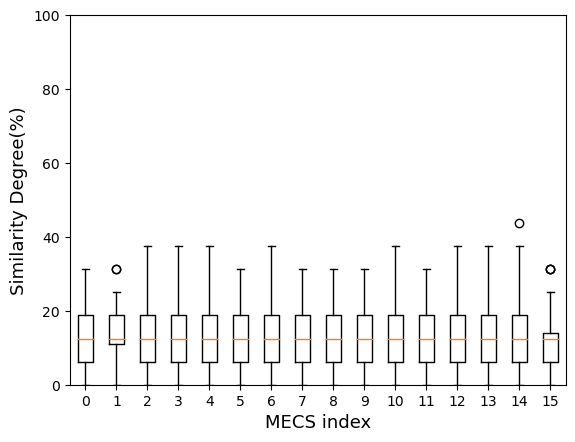

In [30]:
import matplotlib.pyplot as plt

number_of_predict_days = 60

# Create a list of labels for the 16 MECs (e.g., MEC_1, MEC_2, ..., MEC_16)
mec_labels = [f"{i}" for i in range(image_array.shape[1])]

# Create a figure and axis object for the boxplot
fig, ax = plt.subplots()

# Create the boxplot using the boxplot function
ax.boxplot(lstm_conformity_list[:,:number_of_predict_days].T, labels=mec_labels)


# Set axis labels and title
ax.set_xlabel('MECS index', fontsize=13)
ax.set_ylabel('Similarity Degree(%)', fontsize=13)
plt.ylim(0,100)

# Save the plot.png
if case =='5':
    plt.savefig('./Figs/Similarity_Degree/'+file_path[10:]+'_K'+str(K)+'_LSTM.png')
elif case == '6':
    plt.savefig('./Figs/Similarity_Degree/'+file_path[2:]+'_K'+str(K)+'_LSTM.png')
else:
    plt.savefig('./Figs/Similarity_Degree/'+file_path[-9:]+'_K'+str(K)+'_LSTM.png')

# Show the plot
plt.show()

In [31]:
import pandas as pd
# Calculate the Q1, Q2 (mean), and Q3 values for each row
q1_values = np.percentile(lstm_conformity_list[:,:number_of_predict_days], 25, axis=1)
q2_values = np.percentile(lstm_conformity_list[:,:number_of_predict_days], 50, axis=1)
q3_values = np.percentile(lstm_conformity_list[:,:number_of_predict_days], 75, axis=1)

# Create a Pandas DataFrame
df = pd.DataFrame({'Q1': q1_values, 'Q2 (Mean)': q2_values, 'Q3': q3_values})

# Print or use the DataFrame as needed
if case =='5':
    df.to_csv('./Figs/Similarity_Degree/'+file_path[10:]+'_K'+str(K)+'_LSTM_similarity_change.csv')
elif case =='6':
    df.to_csv('./Figs/Similarity_Degree/'+file_path[2:]+'_K'+str(K)+'_LSTM_similarity_change.csv')
else:
    df.to_csv('./Figs/Similarity_Degree/'+file_path[-9:]+'_K'+str(K)+'_LSTM_similarity_change.csv')